In [1]:
#import libraries
import pandas as pd
import pickle
import time
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt




# Load data

In [17]:
df = pd.read_csv("../data/kmerdata1.csv", index_col="sample_id")
df.code

sample_id
NA19720    MXL
NA19719    MXL
NA19678    MXL
NA19676    MXL
NA19468    LWK
NA19456    LWK
NA19454    LWK
NA19440    LWK
HG00238    GBR
HG00236    GBR
HG00235    GBR
HG00234    GBR
Name: code, dtype: object

## Fill NaN with zero counts

In [19]:
df.fillna(0,inplace=True)


## Encorde the codeto numerical

In [20]:

c={'MXL':0, 'GBR':1, 'LWK':2}
df["code"]=df["code"].replace(c)
df.code.unique()

array([0, 2, 1])

## check the balance in the categories

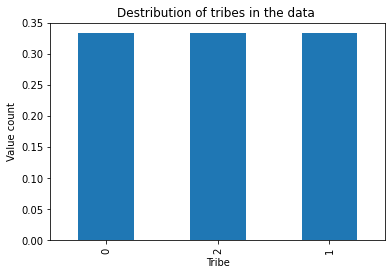

In [30]:
df["code"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Tribe")
plt.ylabel("Value count")
plt.title("Destribution of tribes in the data ")

plt.savefig("destribution.png",dpi=100);

## split data

In [6]:
target = "code"
X =df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (12, 32330)
y shape: (12,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

## baseline score

In [8]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.3333


## Build the model

In [9]:
model = make_pipeline(
    StandardScaler(),
   RandomForestClassifier(n_estimators=100, random_state=42)
)
print(model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [10]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [11]:
model.predict_proba(X_test)

array([[0.  , 0.36, 0.64],
       [0.01, 0.44, 0.55],
       [0.64, 0.23, 0.13]])

In [12]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6667


In [13]:
y_test.value_counts()

2    1
1    1
0    1
Name: code, dtype: int64

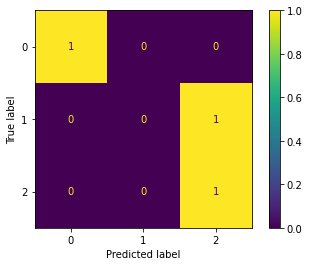

In [31]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

(9, 32330)

In [15]:
y_test

sample_id
NA19454    2
HG00235    1
NA19678    0
Name: code, dtype: int64

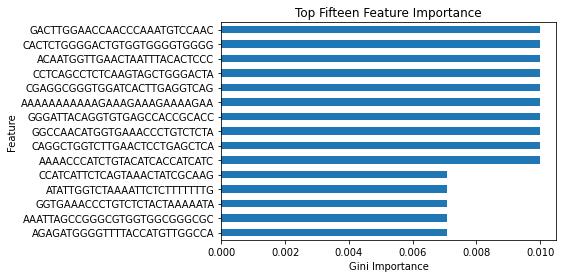

In [33]:
importances = model.named_steps["randomforestclassifier"].feature_importances_


# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Top Fifteen Feature Importance")

plt.savefig("feature_importance.png",dpi=100);

In [22]:
model.predict(X_test)

array([2, 2, 0])

In [23]:
y_test

sample_id
NA19454    2
HG00235    1
NA19678    0
Name: code, dtype: int64

In [25]:
model.predict_proba(X_test)

array([[0.  , 0.36, 0.64],
       [0.01, 0.44, 0.55],
       [0.64, 0.23, 0.13]])

In [83]:
# Save model
with open("MLRad.pkl","wb") as f:
    pickle.dump(model,f)

In [34]:
feat_imp.tail(15)

AGAGATGGGGTTTTACCATGTTGGCCA    0.007065
AAATTAGCCGGGCGTGGTGGCGGGCGC    0.007065
GGTGAAACCCTGTCTCTACTAAAAATA    0.007065
ATATTGGTCTAAAATTCTCTTTTTTTG    0.007065
CCATCATTCTCAGTAAACTATCGCAAG    0.007065
AAAACCCATCTGTACATCACCATCATC    0.010000
CAGGCTGGTCTTGAACTCCTGAGCTCA    0.010000
GGCCAACATGGTGAAACCCTGTCTCTA    0.010000
GGGATTACAGGTGTGAGCCACCGCACC    0.010000
AAAAAAAAAAAGAAAGAAAGAAAAGAA    0.010000
CGAGGCGGGTGGATCACTTGAGGTCAG    0.010000
CCTCAGCCTCTCAAGTAGCTGGGACTA    0.010000
ACAATGGTTGAACTAATTTACACTCCC    0.010000
CACTCTGGGGACTGTGGTGGGGTGGGG    0.010000
GACTTGGAACCAACCCAAATGTCCAAC    0.010000
dtype: float64

In [36]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/home/eanbit/yes/envs/CADD/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eanbit/yes/envs/CADD/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eanbit/yes/envs/CADD/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
df.index

Index(['NA19720', 'NA19719', 'NA19678', 'NA19676', 'NA19468', 'NA19456',
       'NA19454', 'NA19440', 'HG00238', 'HG00236', 'HG00235', 'HG00234'],
      dtype='object', name='sample_id')